In [ ]:
import sklearn

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/DataPreprocessingGraded_dataset.csv')

In [ ]:
data.shape

(748, 6)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [ ]:
feature_matrix=data.drop('Target',axis=1)
feature_matrix.shape

(748, 5)

In [ ]:
label_matrix=data["Target"]
label_matrix.shape

(748,)

In [ ]:
label_matrix[:5]

0    YES
1    YES
2    YES
3    YES
4     NO
Name: Target, dtype: object

In [ ]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
dtypes: float64(2), object(3)
memory usage: 29.3+ KB


In [ ]:
feature_matrix=feature_matrix.replace('?',np.nan)
feature_matrix.head()

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,NaN,NaN,4000.0,35.0,NEGATIVE
3,NaN,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [ ]:
feature_matrix['V1']=feature_matrix['V1'].astype('float')
feature_matrix['V2']=feature_matrix['V2'].astype('float')
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      743 non-null    float64
 1   V2      743 non-null    float64
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
dtypes: float64(4), object(1)
memory usage: 29.3+ KB


In [ ]:
feature_matrix.head()

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,NaN,NaN,4000.0,35.0,NEGATIVE
3,NaN,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [ ]:
new_data=feature_matrix.dropna()
new_data.head()

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE
8,2.0,9.0,2250.0,22.0,NEGATIVE
9,5.0,46.0,11500.0,98.0,NEGATIVE


In [ ]:
new_data.V1.var()

65.6201048072727

In [ ]:
new_data.V2.var()

33.36704181656161

In [ ]:
new_data.V3.var()

2085440.1135351001

In [ ]:
new_data.V4.var()

596.9600206827508

In [ ]:
import seaborn as sns

<Axes: >

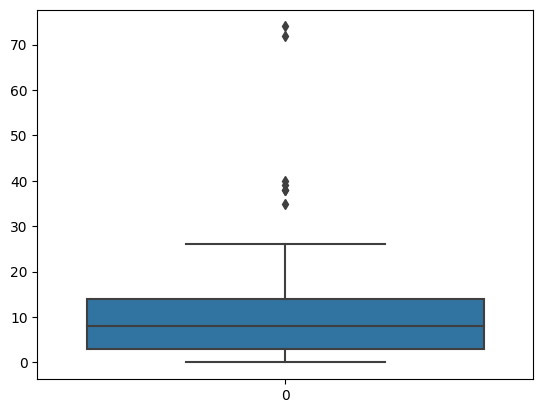

In [ ]:
sns.boxplot(new_data['V1'])

<Axes: >

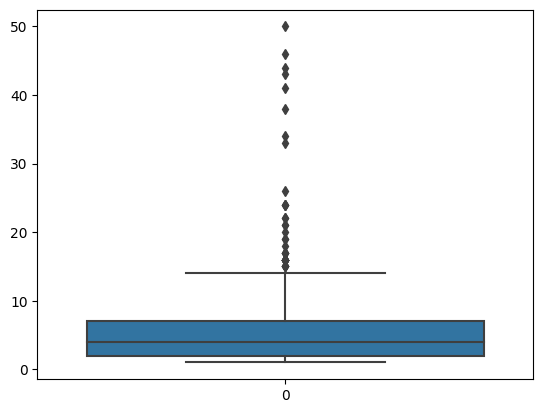

In [ ]:
sns.boxplot(new_data['V2'])

<Axes: >

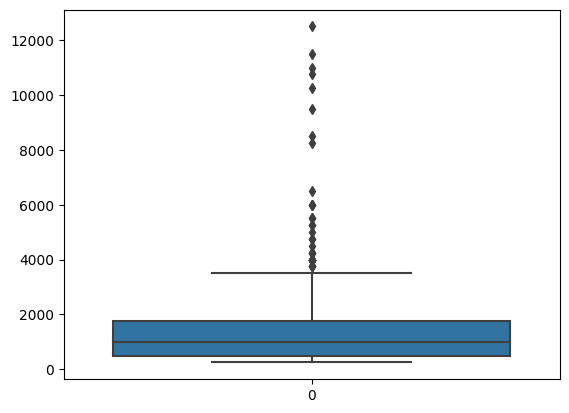

In [ ]:
sns.boxplot(new_data['V3'])

<Axes: >

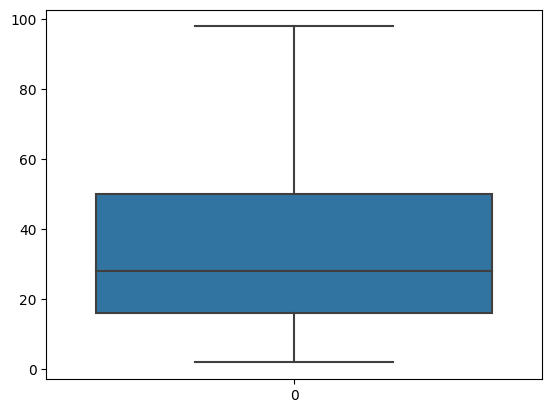

In [ ]:
sns.boxplot(new_data['V4'])

In [ ]:
label_matrix.value_counts()

NO     570
YES    178
Name: Target, dtype: int64

In [ ]:
feature_matrix.isna().sum()

V1    5
V2    5
V3    0
V4    0
V5    0
dtype: int64

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

In [ ]:
si=SimpleImputer(strategy='median')
ct=make_column_transformer((si,['V1']),remainder='passthrough')

In [ ]:
data_V1_median=ct.fit_transform(feature_matrix)
data_V1_median[:5]


array([[2.0, 50.0, 12500.0, 98.0, 'NEGATIVE'],
       [0.0, 13.0, 3250.0, 28.0, 'NEGATIVE'],
       [8.0, nan, 4000.0, 35.0, 'NEGATIVE'],
       [8.0, 20.0, 5000.0, 45.0, 'NEGATIVE'],
       [1.0, 24.0, 6000.0, 77.0, 'NEGATIVE']], dtype=object)

In [ ]:
data_V1_median.shape

(748, 5)

In [ ]:
data_dataframe=pd.DataFrame(data_V1_median)
data_dataframe.head()

,0,1,2,3,4
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,8.0,NaN,4000.0,35.0,NEGATIVE
3,8.0,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [ ]:
data_dataframe.mean()

<ipython-input-92-138cd20443a8>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_dataframe.mean()


0       9.552139
1       5.464334
2    1378.676471
3      34.282086
dtype: float64

In [ ]:
from sklearn.impute import KNNImputer
knni=KNNImputer(n_neighbors = 3)

In [ ]:
cf=make_column_transformer((knni,['V1']),remainder='passthrough')
data_V1_knni=cf.fit_transform(feature_matrix)
data_V1_knni[:5]

array([[2.0, 50.0, 12500.0, 98.0, 'NEGATIVE'],
       [0.0, 13.0, 3250.0, 28.0, 'NEGATIVE'],
       [9.562584118438762, nan, 4000.0, 35.0, 'NEGATIVE'],
       [9.562584118438762, 20.0, 5000.0, 45.0, 'NEGATIVE'],
       [1.0, 24.0, 6000.0, 77.0, 'NEGATIVE']], dtype=object)

In [ ]:
df=pd.DataFrame(data_V1_knni)
df.mean()

<ipython-input-98-2dad47f52200>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


0       9.562584
1       5.464334
2    1378.676471
3      34.282086
dtype: float64

In [ ]:
simp=SimpleImputer(strategy='mean')

In [ ]:
ctf=make_column_transformer((knni,['V2']),remainder='passthrough')

In [ ]:
data_V2_mean=ctf.fit_transform(feature_matrix)
data_V2_mean[:5]

array([[50.0, 2.0, 12500.0, 98.0, 'NEGATIVE'],
       [13.0, 0.0, 3250.0, 28.0, 'NEGATIVE'],
       [5.464333781965006, nan, 4000.0, 35.0, 'NEGATIVE'],
       [20.0, nan, 5000.0, 45.0, 'NEGATIVE'],
       [24.0, 1.0, 6000.0, 77.0, 'NEGATIVE']], dtype=object)

In [ ]:
dtf=pd.DataFrame(data_V2_mean)
dtf.head()

,0,1,2,3,4
0,50.0,2.0,12500.0,98.0,NEGATIVE
1,13.0,0.0,3250.0,28.0,NEGATIVE
2,5.464334,NaN,4000.0,35.0,NEGATIVE
3,20.0,NaN,5000.0,45.0,NEGATIVE
4,24.0,1.0,6000.0,77.0,NEGATIVE


In [ ]:
dtf.mean()

<ipython-input-111-875eb31fd04a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dtf.mean()


0       5.464334
1       9.562584
2    1378.676471
3      34.282086
dtype: float64